Training with L2 regularization (λ = 0.1 )
Iteration 0, Cost: 0.6931, Accuracy: 0.3714
Iteration 100, Cost: 0.1061, Accuracy: 0.9824
Iteration 200, Cost: 0.0875, Accuracy: 0.9824
Iteration 300, Cost: 0.0793, Accuracy: 0.9824
Iteration 400, Cost: 0.0744, Accuracy: 0.9846
Iteration 500, Cost: 0.0711, Accuracy: 0.9868
Iteration 600, Cost: 0.0686, Accuracy: 0.9868
Iteration 700, Cost: 0.0666, Accuracy: 0.9868
Iteration 800, Cost: 0.0650, Accuracy: 0.9868
Iteration 900, Cost: 0.0636, Accuracy: 0.9868
Iteration 1000, Cost: 0.0625, Accuracy: 0.9868
Iteration 1100, Cost: 0.0615, Accuracy: 0.9868
Iteration 1200, Cost: 0.0607, Accuracy: 0.9868
Iteration 1300, Cost: 0.0599, Accuracy: 0.9868
Iteration 1400, Cost: 0.0592, Accuracy: 0.9868
Iteration 1500, Cost: 0.0586, Accuracy: 0.9868
Iteration 1600, Cost: 0.0581, Accuracy: 0.9868
Iteration 1700, Cost: 0.0576, Accuracy: 0.9868
Iteration 1800, Cost: 0.0571, Accuracy: 0.9868
Iteration 1900, Cost: 0.0567, Accuracy: 0.9868

Training without regularizat

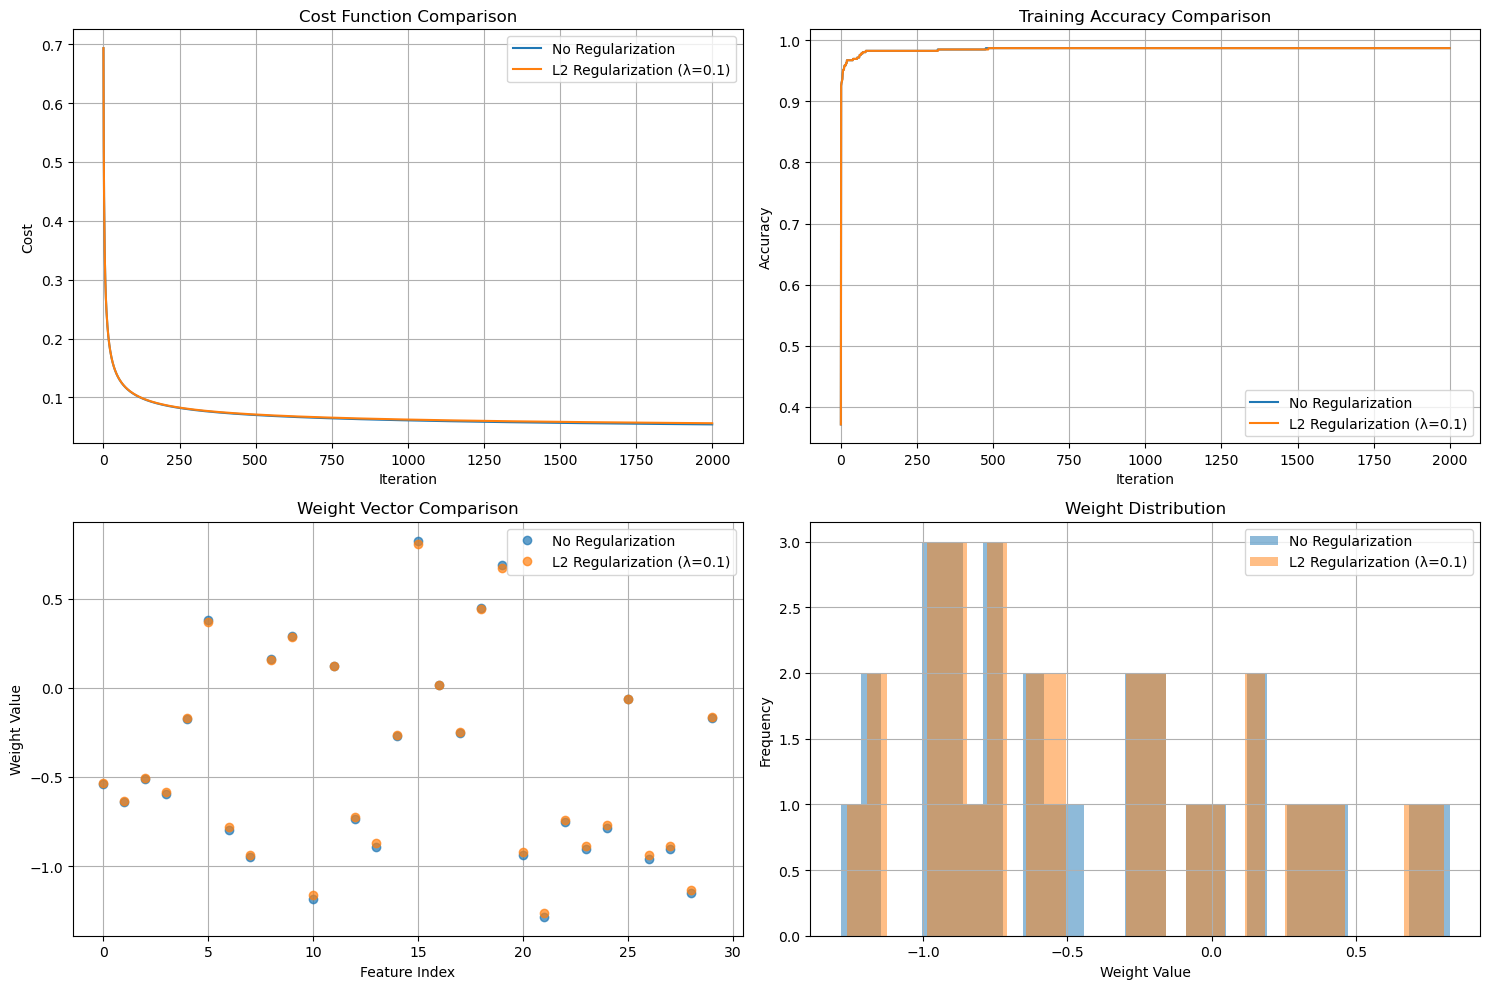

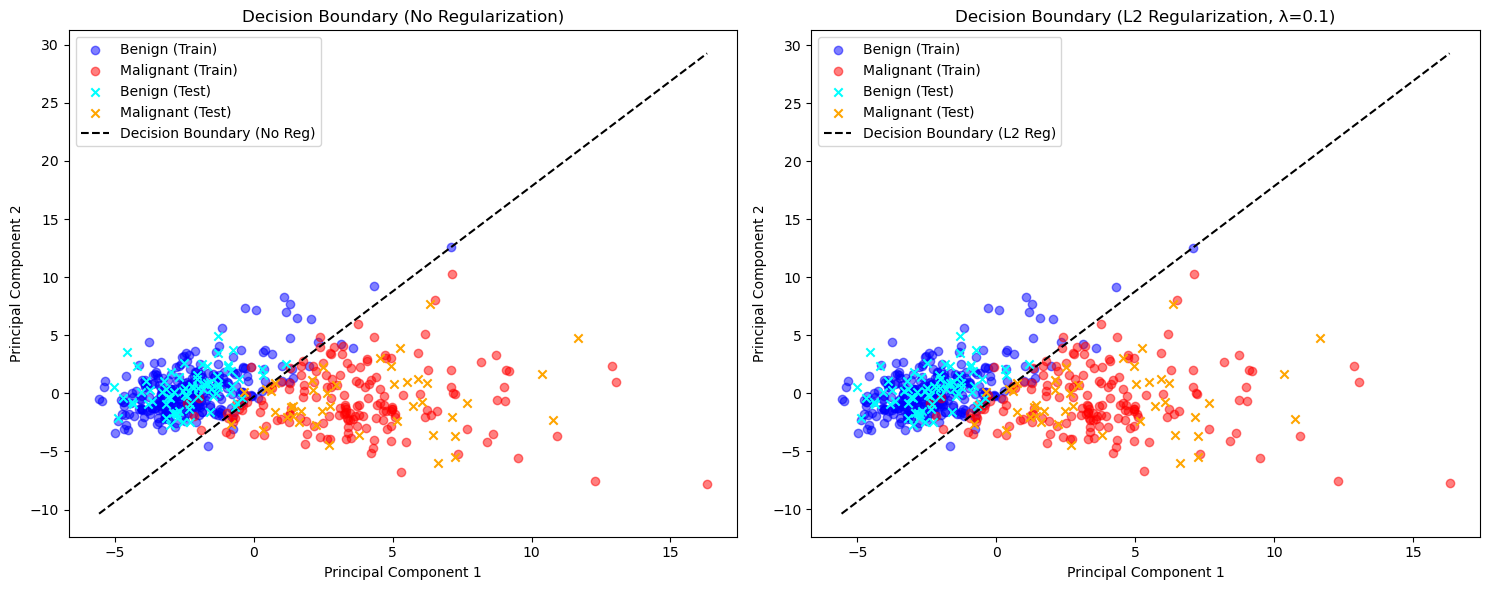

Iteration 0, Cost: 0.6931, Accuracy: 0.3714
Iteration 100, Cost: 0.1057, Accuracy: 0.9824
Iteration 200, Cost: 0.0870, Accuracy: 0.9824
Iteration 300, Cost: 0.0786, Accuracy: 0.9824
Iteration 400, Cost: 0.0736, Accuracy: 0.9846
Iteration 500, Cost: 0.0701, Accuracy: 0.9868
Iteration 600, Cost: 0.0675, Accuracy: 0.9868
Iteration 700, Cost: 0.0655, Accuracy: 0.9868
Iteration 800, Cost: 0.0638, Accuracy: 0.9868
Iteration 900, Cost: 0.0623, Accuracy: 0.9868
Iteration 1000, Cost: 0.0611, Accuracy: 0.9868
Iteration 1100, Cost: 0.0601, Accuracy: 0.9868
Iteration 1200, Cost: 0.0591, Accuracy: 0.9868
Iteration 1300, Cost: 0.0583, Accuracy: 0.9868
Iteration 1400, Cost: 0.0575, Accuracy: 0.9868
Iteration 1500, Cost: 0.0569, Accuracy: 0.9868
Iteration 1600, Cost: 0.0563, Accuracy: 0.9868
Iteration 1700, Cost: 0.0557, Accuracy: 0.9868
Iteration 1800, Cost: 0.0552, Accuracy: 0.9868
Iteration 1900, Cost: 0.0547, Accuracy: 0.9868
λ=0.000, Train Acc: 0.9868, Test Acc: 0.9912, Weight Norm: 3.8773
Iterat

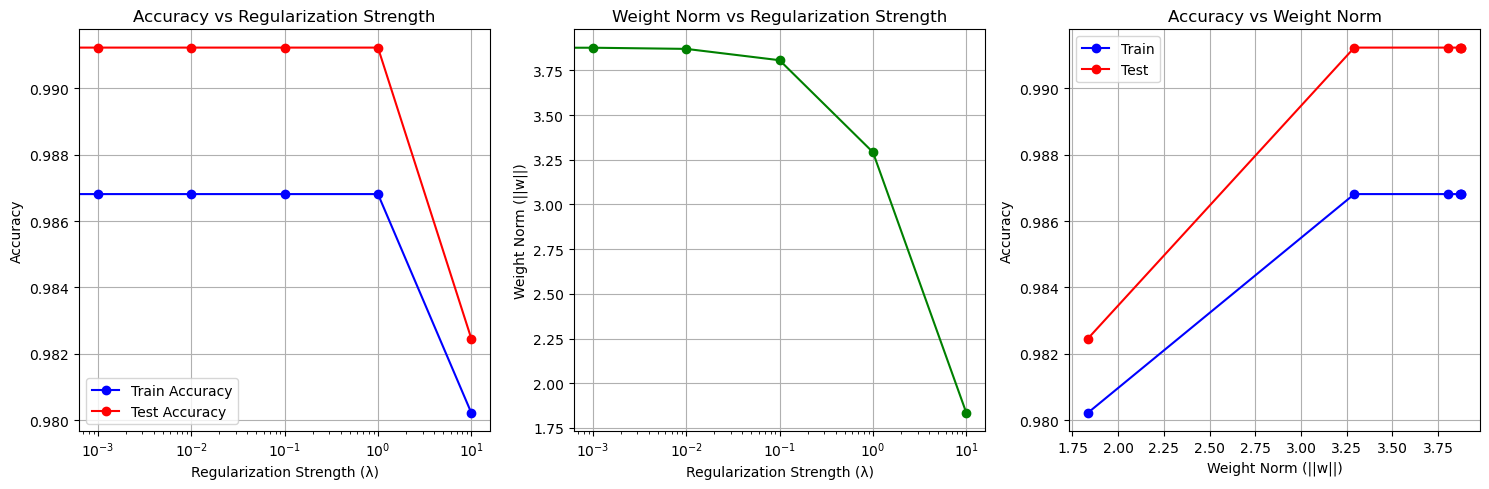

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 加载乳腺癌数据集
data = load_breast_cancer()
X = data.data.T  # 转置后，行表示特征(n)，列表示样本(m)
y = data.target.reshape(1, -1)  # 将标签转换为行向量

# 数据预处理 - 标准化
X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

# 划分训练集和测试集 (80%训练，20%测试)
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train = X_train.T  # 转置回原始格式
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# 初始化参数
n, m_train = X_train.shape
learning_rate = 0.1
iterations = 2000
lambda_reg = 0.1  # L2正则化系数

# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 带L2正则化的逻辑回归训练函数
def train_logistic_regression_with_l2(X_train, y_train, lambda_reg, learning_rate, iterations):
    # 初始化参数
    w = np.zeros((n, 1))
    b = 0
    cost_history = []
    accuracy_history = []
    
    for i in range(iterations):
        # 前向传播
        z = np.dot(w.T, X_train) + b
        yhat = sigmoid(z)
        
        # 计算损失 (交叉熵损失 + L2正则化项)
        cross_entropy_loss = -np.mean(y_train * np.log(yhat + 1e-8) + (1 - y_train) * np.log(1 - yhat + 1e-8))
        l2_regularization = (lambda_reg / (2 * m_train)) * np.sum(w**2)
        cost = cross_entropy_loss + l2_regularization
        cost_history.append(cost)
        
        # 计算准确率
        predictions = (yhat > 0.5).astype(int)
        accuracy = np.mean(predictions == y_train)
        accuracy_history.append(accuracy)
        
        # 反向传播 (加入L2正则化的梯度)
        dz = yhat - y_train
        dw = np.dot(X_train, dz.T) / m_train + (lambda_reg / m_train) * w
        db = np.sum(dz) / m_train
        
        # 更新参数
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # 每100次迭代打印一次损失
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}, Accuracy: {accuracy:.4f}")
    
    return w, b, cost_history, accuracy_history

# 训练模型 (带L2正则化)
print("Training with L2 regularization (λ =", lambda_reg, ")")
w_reg, b_reg, cost_history_reg, accuracy_history_reg = train_logistic_regression_with_l2(
    X_train, y_train, lambda_reg, learning_rate, iterations)

# 训练模型 (无正则化)
print("\nTraining without regularization")
w_no_reg, b_no_reg, cost_history_no_reg, accuracy_history_no_reg = train_logistic_regression_with_l2(
    X_train, y_train, 0, learning_rate, iterations)

# 在测试集上评估带正则化的模型
z_test_reg = np.dot(w_reg.T, X_test) + b_reg
yhat_test_reg = sigmoid(z_test_reg)
predictions_test_reg = (yhat_test_reg > 0.5).astype(int)
test_accuracy_reg = np.mean(predictions_test_reg == y_test)

# 在测试集上评估无正则化的模型
z_test_no_reg = np.dot(w_no_reg.T, X_test) + b_no_reg
yhat_test_no_reg = sigmoid(z_test_no_reg)
predictions_test_no_reg = (yhat_test_no_reg > 0.5).astype(int)
test_accuracy_no_reg = np.mean(predictions_test_no_reg == y_test)

print("\nTest Accuracy:")
print(f"With L2 regularization (λ={lambda_reg}): {test_accuracy_reg*100:.2f}%")
print(f"Without regularization: {test_accuracy_no_reg*100:.2f}%")

# 绘制训练过程比较
plt.figure(figsize=(15, 10))

# 损失函数比较
plt.subplot(2, 2, 1)
plt.plot(cost_history_no_reg, label='No Regularization')
plt.plot(cost_history_reg, label=f'L2 Regularization (λ={lambda_reg})')
plt.title('Cost Function Comparison')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# 准确率比较
plt.subplot(2, 2, 2)
plt.plot(accuracy_history_no_reg, label='No Regularization')
plt.plot(accuracy_history_reg, label=f'L2 Regularization (λ={lambda_reg})')
plt.title('Training Accuracy Comparison')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 权重向量比较
plt.subplot(2, 2, 3)
plt.plot(w_no_reg, 'o', label='No Regularization', alpha=0.7)
plt.plot(w_reg, 'o', label=f'L2 Regularization (λ={lambda_reg})', alpha=0.7)
plt.title('Weight Vector Comparison')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

# 权重值分布直方图
plt.subplot(2, 2, 4)
plt.hist(w_no_reg, bins=30, alpha=0.5, label='No Regularization')
plt.hist(w_reg, bins=30, alpha=0.5, label=f'L2 Regularization (λ={lambda_reg})')
plt.title('Weight Distribution')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 绘制决策边界比较
plt.figure(figsize=(15, 6))

# 使用PCA降维到2D以便可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T).T

# 重新划分训练集和测试集的PCA结果
X_train_pca, X_test_pca = pca.transform(X_train.T).T, pca.transform(X_test.T).T

# 无正则化的决策边界
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[0, y_train[0] == 1], X_train_pca[1, y_train[0] == 1], color='blue', alpha=0.5, label='Benign (Train)')
plt.scatter(X_train_pca[0, y_train[0] == 0], X_train_pca[1, y_train[0] == 0], color='red', alpha=0.5, label='Malignant (Train)')
plt.scatter(X_test_pca[0, y_test[0] == 1], X_test_pca[1, y_test[0] == 1], color='cyan', marker='x', label='Benign (Test)')
plt.scatter(X_test_pca[0, y_test[0] == 0], X_test_pca[1, y_test[0] == 0], color='orange', marker='x', label='Malignant (Test)')

# 无正则化的决策边界
w_pca_no_reg = pca.components_ @ w_no_reg
x_boundary = np.array([np.min(X_pca[0]), np.max(X_pca[0])])
y_boundary_no_reg = (-w_pca_no_reg[0] * x_boundary - b_no_reg) / w_pca_no_reg[1]
plt.plot(x_boundary, y_boundary_no_reg, 'k--', label='Decision Boundary (No Reg)')

plt.title('Decision Boundary (No Regularization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# 带L2正则化的决策边界
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[0, y_train[0] == 1], X_train_pca[1, y_train[0] == 1], color='blue', alpha=0.5, label='Benign (Train)')
plt.scatter(X_train_pca[0, y_train[0] == 0], X_train_pca[1, y_train[0] == 0], color='red', alpha=0.5, label='Malignant (Train)')
plt.scatter(X_test_pca[0, y_test[0] == 1], X_test_pca[1, y_test[0] == 1], color='cyan', marker='x', label='Benign (Test)')
plt.scatter(X_test_pca[0, y_test[0] == 0], X_test_pca[1, y_test[0] == 0], color='orange', marker='x', label='Malignant (Test)')

# 带正则化的决策边界
w_pca_reg = pca.components_ @ w_reg
y_boundary_reg = (-w_pca_reg[0] * x_boundary - b_reg) / w_pca_reg[1]
plt.plot(x_boundary, y_boundary_reg, 'k--', label='Decision Boundary (L2 Reg)')

plt.title(f'Decision Boundary (L2 Regularization, λ={lambda_reg})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# 比较不同正则化强度的影响
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
weight_norms = []

for lambda_val in lambdas:
    w_temp, b_temp, _, _ = train_logistic_regression_with_l2(
        X_train, y_train, lambda_val, learning_rate, iterations)
    
    # 训练准确率
    z_train = np.dot(w_temp.T, X_train) + b_temp
    yhat_train = sigmoid(z_train)
    predictions_train = (yhat_train > 0.5).astype(int)
    train_acc = np.mean(predictions_train == y_train)
    train_accuracies.append(train_acc)
    
    # 测试准确率
    z_test = np.dot(w_temp.T, X_test) + b_temp
    yhat_test = sigmoid(z_test)
    predictions_test = (yhat_test > 0.5).astype(int)
    test_acc = np.mean(predictions_test == y_test)
    test_accuracies.append(test_acc)
    
    # 权重范数
    weight_norm = np.linalg.norm(w_temp)
    weight_norms.append(weight_norm)
    
    print(f"λ={lambda_val:.3f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Weight Norm: {weight_norm:.4f}")

# 绘制不同正则化强度的效果
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(lambdas, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(lambdas, test_accuracies, 'ro-', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Strength')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lambdas, weight_norms, 'go-')
plt.xscale('log')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Weight Norm (||w||)')
plt.title('Weight Norm vs Regularization Strength')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(weight_norms, train_accuracies, 'bo-', label='Train')
plt.plot(weight_norms, test_accuracies, 'ro-', label='Test')
plt.xlabel('Weight Norm (||w||)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Weight Norm')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()